### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 13,9

### Retrieve DataSet

In [21]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### ------------------------------------------------------------------------------------
## DEPARTMENT WISE PERFORMANCE RATING VISUALIZATION
### ------------------------------------------------------------------------------------

In [22]:
dep_wise = data[['EmpDepartment','PerformanceRating']]

In [23]:
dep_wise.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [24]:
dep = pd.crosstab(dep_wise.EmpDepartment,dep_wise.PerformanceRating)

In [25]:
dep

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


In [26]:
dep.reset_index(inplace=True)

In [27]:
dep

PerformanceRating,EmpDepartment,2,3,4
0,Data Science,1,17,2
1,Development,13,304,44
2,Finance,15,30,4
3,Human Resources,10,38,6
4,Research & Development,68,234,41
5,Sales,87,251,35


In [28]:
x = np.arange(len(dep['EmpDepartment']))
x

array([0, 1, 2, 3, 4, 5])

Text(0.5,1,'Department Wise Performance')

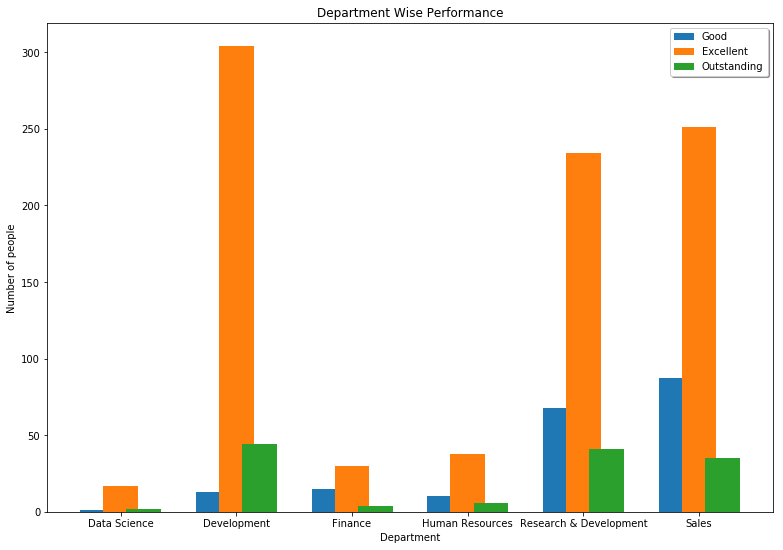

In [29]:
plt.xticks(x,dep['EmpDepartment'])
plt.bar(x-0.2, dep[2],width=0.3,label='Good')
plt.bar(x, dep[3],width=0.3,label='Excellent')
plt.bar(x+0.2, dep[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Department')
plt.ylabel('Number of people')
plt.title('Department Wise Performance')

### ------------------------------------------------------------------------------------
### TOP 3 IMPORTANT FACTOR EFFECT ON PERFORMANCE RATING
#### => Employee Environment Satisfaction
#### => Employee Last Salary Hike Percentage
#### => Employee Work Life Balance
### ------------------------------------------------------------------------------------

#### -----------------------------------------------------------------------------------------------------
### Employee Environment Satisfaction
#### -----------------------------------------------------------------------------------------------------

In [31]:
Top1 = pd.crosstab(data.EmpEnvironmentSatisfaction,dep_wise.PerformanceRating)

In [32]:
Top1

PerformanceRating,2,3,4
EmpEnvironmentSatisfaction,,,
1,90,127,13
2,98,130,14
3,3,310,54
4,3,307,51


In [33]:
Top1.reset_index(inplace=True)

In [34]:
Top1

PerformanceRating,EmpEnvironmentSatisfaction,2,3,4
0,1,90,127,13
1,2,98,130,14
2,3,3,310,54
3,4,3,307,51


In [35]:
x = np.arange(len(Top1['EmpEnvironmentSatisfaction']))
x

array([0, 1, 2, 3])

Text(0.5,1,'Employee Environment Satisfaction Wise Performance')

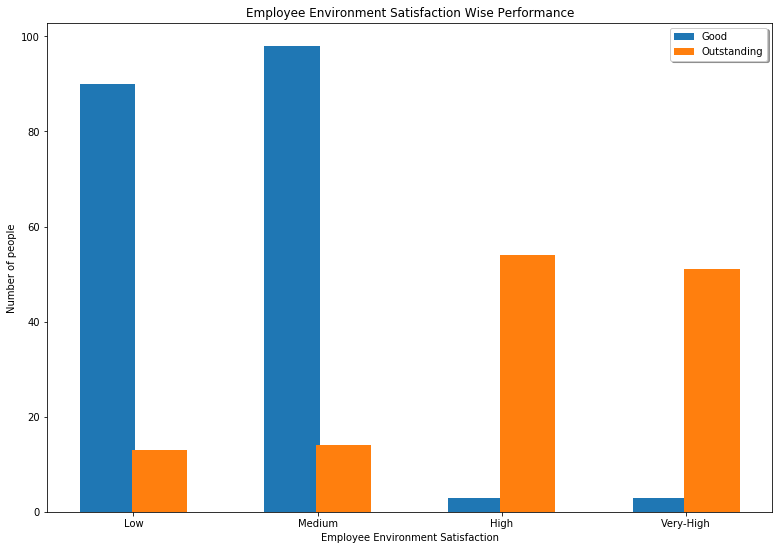

In [36]:
plt.xticks(x,['Low','Medium','High','Very-High'])
plt.bar(x-0.14, Top1[2],width=0.3,label='Good')
plt.bar(x+0.14, Top1[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Environment Satisfaction')
plt.ylabel('Number of people')
plt.title('Employee Environment Satisfaction Wise Performance')

#### -----------------------------------------------------------------------------------------------------
### Employee Last Salary Hike Percent
#### -----------------------------------------------------------------------------------------------------

In [37]:
Top2 = pd.crosstab(data.EmpLastSalaryHikePercent,dep_wise.PerformanceRating)

In [38]:
Top2

PerformanceRating,2,3,4
EmpLastSalaryHikePercent,,,
11,28,140,1
12,30,123,2
13,27,138,3
14,28,140,4
15,11,67,4
16,12,54,2
17,9,55,3
18,10,63,0
19,10,51,2


In [39]:
Top2.reset_index(inplace=True)

In [40]:
Top2

PerformanceRating,EmpLastSalaryHikePercent,2,3,4
0,11,28,140,1
1,12,30,123,2
2,13,27,138,3
3,14,28,140,4
4,15,11,67,4
5,16,12,54,2
6,17,9,55,3
7,18,10,63,0
8,19,10,51,2
9,20,9,14,27


In [41]:
x = np.arange(len(Top2['EmpLastSalaryHikePercent']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5,1,'Last Salary Hike percent Wise Performance')

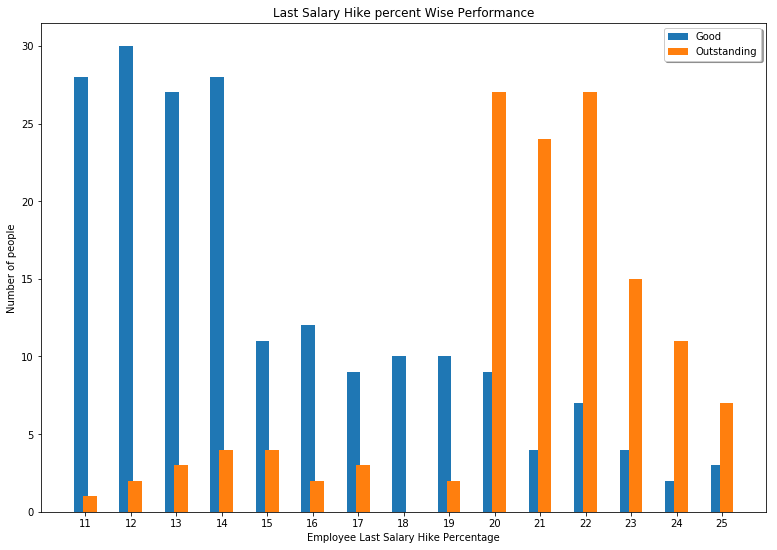

In [42]:
plt.xticks(x,Top2['EmpLastSalaryHikePercent'])
plt.bar(x-0.1, Top2[2],width=0.3,label='Good')
plt.bar(x+0.1, Top2[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Last Salary Hike Percentage')
plt.ylabel('Number of people')
plt.title('Last Salary Hike percent Wise Performance')

#### -----------------------------------------------------------------------------------------------------
### Employee Work Life Balance
#### -----------------------------------------------------------------------------------------------------

In [92]:
Top3 = pd.crosstab(data.EmpWorkLifeBalance,dep_wise.PerformanceRating)

In [93]:
Top3

PerformanceRating,2,3,4
EmpWorkLifeBalance,,,
1,16,48,0
2,51,216,27
3,115,533,79
4,12,77,26


In [94]:
Top3.reset_index(inplace=True)

In [95]:
Top3

PerformanceRating,EmpWorkLifeBalance,2,3,4
0,1,16,48,0
1,2,51,216,27
2,3,115,533,79
3,4,12,77,26


In [96]:
x = np.arange(len(Top3['EmpWorkLifeBalance']))
x

array([0, 1, 2, 3])

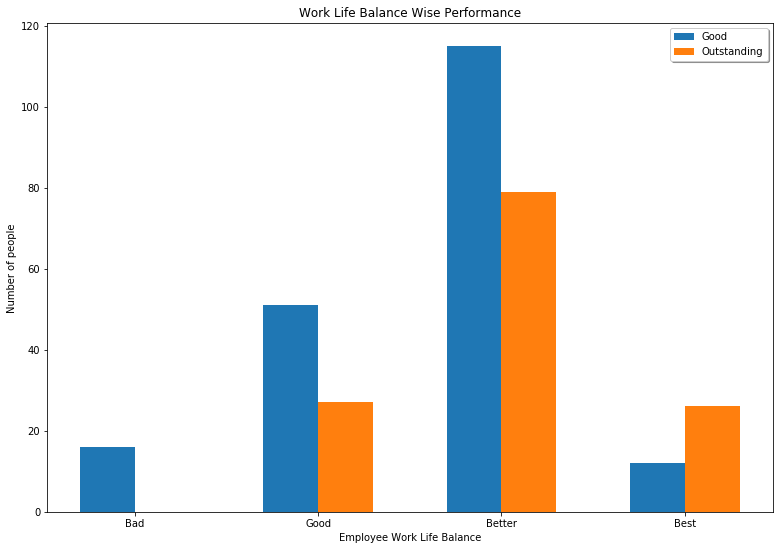

In [100]:
plt.xticks(x,['Bad','Good','Better','Best'])
plt.bar(x-0.15, Top3[2],width=0.3,label='Good')
#plt.bar(x, Top3[3],width=0.3,label='Excellent')
plt.bar(x+0.15, Top3[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Work Life Balance')
plt.ylabel('Number of people')
plt.title('Work Life Balance Wise Performance')
plt.savefig('Emp_Work_Life_wise_Performance.jpg')